Наивный байесовский классификатор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими предположениями о независимости.

В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

Несмотря на наивный вид и очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных жизненных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

Теория:
У нас есть некоторый объект, который относится к какому-либо классу, и нам нужно вычислить, к какому классу вероятнее всего относится объект.    

Пользуясь теоремой Байеса, нахождение P(C|O) переходит к косвенным вероятностям.

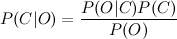

Выделяя свойства объектов, можно перейти к вероятностям принадлежности свойств. 

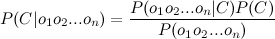

Принимая, что свойства независимы друг от друга и зависят только от класса, можно перейти к формуле: 

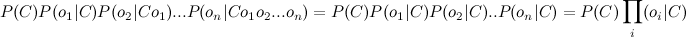

И тогда финальная формула будет выглядеть так, что сведет задачу к вычислению вероятностей P(C) и P(O|C).

In [1]:
from collections import defaultdict
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class NaiveBayesClassifier(object):
    def __init__(self):  
        self.__class_freq = defaultdict(lambda:0)
        self.__feat_freq = defaultdict(lambda:0)

    def fit(self, X, y):
        #считаем классы и частоты особенностей
        for feature, label in zip(X, y):
            self.__class_freq[label] += 1
            for value in feature:
                self.__feat_freq[(value, label)] += 1

        #нормализуем значения
        num_samples = len(X)
        
        #P(C)
        for k in self.__class_freq:
            self.__class_freq[k] /= num_samples
        
        #P(O|C)
        for value, label in self.__feat_freq:
            self.__feat_freq[(value, label)] /= self.__class_freq[label]

        return self
    
    def predict(self, X):
        #получаем argmin(-log(C|O))
        return min(self.__class_freq.keys(), 
                   key=lambda c : self.__calculate_class_freq(X, c)) 

    def __calculate_class_freq(self, X, clss):
        #считаем частоту для заданного класса
        freq = - np.log(self.__class_freq[clss])

        for feat in X: 
            freq += - np.log(self.__feat_freq.get((feat, clss), 10 ** (-7)))
        return freq

Переход к логарифмам и добавление 10^(-7) осуществляется для избежания умножения на 0 и избегания слишком маленьких вероятностей.

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = NaiveBayesClassifier().fit(X_train, y_train)

predictions = [model.predict(x) for x in X_test]
print(accuracy_score(predictions, y_test))

0.7456140350877193


In [3]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = NaiveBayesClassifier().fit(X_train, y_train)

predictions = [model.predict(x) for x in X_test]
print(accuracy_score(predictions, y_test))

0.9666666666666667
